<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/Factor_Analysis/Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install factor_analyzer==0.2.3

In [3]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("bfi.csv")

In [5]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [6]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [8]:
df=df.iloc[:,1:]

In [9]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [10]:
df.dropna(inplace=True)

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [12]:
chi_squared_value,p_val=calculate_bartlett_sphericity(df)

In [13]:
p_val

0.0

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(df)

In [16]:
kmo_model

0.8486452309468395

In [25]:
fa = FactorAnalyzer()
fa.analyze(df, 25, rotation=None)

In [26]:
ev,v= fa.get_eigenvalues()

In [27]:
ev

,Original_Eigenvalues
0,5.134311
1,2.751887
2,2.142702
3,1.852328
4,1.548163
5,1.073582
6,0.839539
7,0.799206
8,0.718989
9,0.688089


In [28]:
v

,Common_Factor_Eigenvalues
0,4.738993
1,2.396330
2,1.702322
3,1.353750
4,1.106835
5,0.619258
6,0.388520
7,0.346797
8,0.243244
9,0.234526


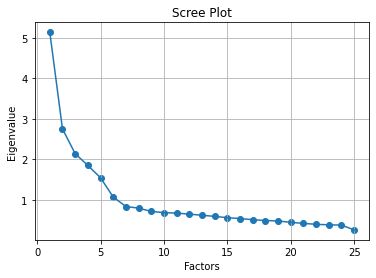

In [29]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [30]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
t=fa.analyze(df, 6, rotation="varimax")

In [33]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.040783,0.095220,0.048734,-0.113057,-0.530987,0.161216
A2,0.235538,0.033131,0.133714,0.063734,0.661141,-0.006244
A3,0.343008,-0.009621,0.121353,0.033990,0.605933,0.160106
A4,0.219717,-0.081518,0.235140,-0.125338,0.404594,0.086356
A5,0.414458,-0.149616,0.106382,0.030977,0.469698,0.236519
C1,0.077248,-0.004358,0.554582,0.190124,0.007511,0.095035
C2,0.038370,0.068330,0.674545,0.087593,0.057055,0.152775
C3,0.031867,-0.039994,0.551164,-0.011338,0.101282,0.008996
C4,-0.066241,0.216283,-0.638475,-0.143846,-0.102617,0.318359
C5,-0.180812,0.284187,-0.544838,0.025837,-0.059955,0.132423


In [34]:
# Get variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,2.602239,2.726989,2.073471,1.504831,1.713499,0.630297
Proportion Var,0.104090,0.109080,0.082939,0.060193,0.068540,0.025212
Cumulative Var,0.104090,0.213169,0.296108,0.356301,0.424841,0.450053
